## Project Outline
To predict the client's on subscribing the Term Deposits by using a classification model.
Before making predictions, a base level analysis is performed which is shown here in the coming steps to understand the pattern/behaviour of the previous data collected w.r.t clients who are being contacted by the marketing team.
Some suggestions for improvement are also added 
#### 1. Importing the libraries and reading the dataset
Project related libraries and packages are imported to perform the activities. Load the dataset shared with respect to the banking marketing campaign
#### 2. Analysing and pre-processing of data

##### i). Understanding the features - Impact of client's behaviour to the subscription
Below mentioned graphs are plotted here to understand the client's interest
1. Term Deposit Subscriptions
2. Analysis - Opt for Term Deposit - Marital Status wise
3. Analysis - Opt for Term Deposit - Age wise
4. Analysis - Opt for Term Deposit - Age vs Marital Status
5. Analysis - Opt for Term Deposit - With/Without Loan
6. Analysis - Opt for Term Deposit - Based on Previous Campaign
7. Analysis - Opt for Term Deposit - Based on Duration
8. Analysis - Opt for Term Deposit - Based on Job and Education

##### ii). Data Transformation
All the categorical or object variables are transformed to the intended formats before performing the modelling
#### 3. Modeling the problem
After doing all the necessary steps, tried implementing the below models:
1. Logistic Regression with no tuning and validated with cross validation
2. Random Forest Classifier by tuning the hyperparameters with Randomized Search CV regularisation
3. Measured and validated the important features using the Random Forest Classifier
4. Compared the models implemented
5. Verified the feature importances using RandomForest/XG Boost and removed the columns that are not making sense and implemented the models to check the accuracy
6. Plotted and validated the ROC curves of Logistic and Random Forest

#### 4. Model for deployment
Considering the accuracies obtained using the Random Forest after feature selection, Random Forest classifier is chosen as the final model for integration

### 1. Importing libraries, reading the dataset

In [15]:
# Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Reading the marketing data from the excel file
dataset=pd.read_excel("./Bank.xlsx")

### 2. Analysing and pre-processing of data

##### 2.1. View of the dataset

In [17]:
# A basic view of the data
dataset.head(1)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [18]:
#Shape of the data
dataset.shape

(41188, 21)

In [19]:
# Checking for the presence of NA values
dataset.isna().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

<div class="alert alert-block alert-danger">
<b>**Observation**</b>
   This dataset has totally 41188 records with 21 columns.
    <i> And there are no null values in any of the columns. There is no need for Data Imputation.</i>
</div>

##### 2.2. Understanding the features - Impact of client's behaviour to the subscription

<div class="alert alert-block alert-warning">
<b>**Information**</b>
<i> Let's try to analyse the data and see what we can understand or learn. y- column is the predictant feature which determines whether the user has opted for the Term Deposits. Let's see how many people have subscribed to the Term Deposit in the previous collected records</i>
</div>

In [20]:
# To see how many have subscribed the Term Deposit
totalSubscribed=dataset['y'].value_counts()
totalSubscribed

no     36548
yes     4640
Name: y, dtype: int64

In [21]:
ncount=len(dataset)

###### 2.2.1::::Plot-1 Term Deposit Subscriptions

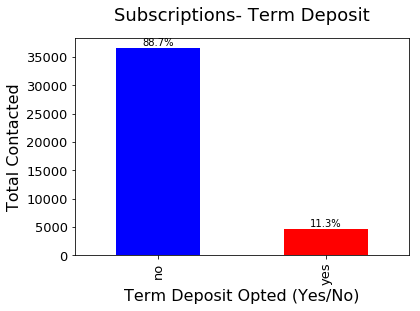

In [22]:
view=totalSubscribed.plot.bar(fontsize=13,color=['blue','red'])
plt.xlabel('Term Deposit Opted (Yes/No)',fontsize=16)
plt.ylabel('Total Contacted',fontsize=16)
plt.title('Subscriptions- Term Deposit',fontsize=18,y=1.05)

for p in view.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    view.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom')

<div class="alert alert-block alert-danger">
<b>**Observation**</b>
    11.3% of people turned to be positive and subscribed the Term Deposit from the total of 41188 people who are contacted out by the marketing team
</div>

In [23]:
# Making a copy of the data where we can modify the features for better analysis.
# This is a temporary dataset created only to visualize the whole data with modifications
datasetCopy=dataset.copy()

<div class="alert alert-block alert-warning">
<b>**Information**</b>
<i> Creating a new dataframe by copying only the data with the value 'yes' in the 'y' column.
This is done to analyse about the people who have opted for the Term Deposits
</i></div>

In [24]:
# Making a copy of the data where we can modify the features for better analysis.
# This is a temporary dataset created only to visualize the data about who have opted for Term Deposit
subscribedData=datasetCopy[datasetCopy['y']=='yes']

In [25]:
subscribedData.shape
# Now the modified dataframe has the data only for the subscribed

(4640, 21)

###### 2.2.2. Plot-2::::Analysis - Opt for Term Deposit - Marital Status wise

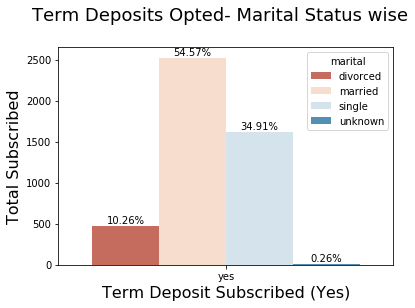

In [26]:
view=sns.countplot(x="y",hue="marital", data=subscribedData,palette="RdBu");
ncount=len(subscribedData)
plt.suptitle("Term Deposits Opted- Marital Status wise", fontsize=18,y=1.02)
view.set_xlabel("Term Deposit Subscribed (Yes)",fontsize=16)
view.set_ylabel("Total Subscribed",fontsize=16)

for p in view.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    view.annotate('{:.2f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') 

<div class="alert alert-block alert-danger">
<b>Observations - Based on Marital Status</b>
</div>
<div>From the total people who opted the Term Deposits, Married and Single people are the ones who are showing much willingness to use the Term deposit feature.</div>

###### 2.2.3. Plot-3::::Analysis - Opt for Term Deposit - Age wise

In [27]:
# Grouping together the age groups as below for better visualising and adding a new column (ageGroup) to the temporary dataset
def change(data):
    if data <=20:
        return '<=20 Yrs'
    elif 21<=data<=25:
        return '21-25 Yrs'
    elif 26<=data<=30:
        return '26-30 Yrs'
    elif 31<=data<=35:
        return '31-35 Yrs'
    elif 36<=data<=40:
        return '36-40 Yrs'
    elif 41<=data<=50:
        return '41-50 Yrs'
    elif 51<=data<=60:
        return '51-60 Yrs'
    elif data > 60:
        return '>60 Yrs'
    
subscribedData['ageGroup']=[change (x) for x in subscribedData['age'] ]

C:\Users\Rebecca\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


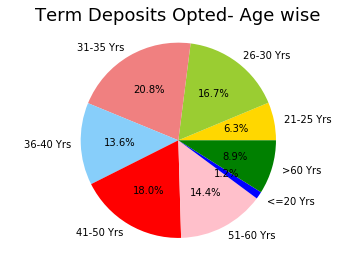

In [28]:
df=subscribedData.y.groupby(subscribedData.ageGroup).count().reset_index()
plt.pie(df.y,labels=df.ageGroup,autopct='%1.1f%%',colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','red','pink','blue','green'])
#plt.xlabel('Subscribed Age Group',fontsize=16)
plt.title('Term Deposits Opted- Age wise',fontsize=18,y=1.02)
plt.axis('equal')
for p in view.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    view.annotate('{:.2f}%'.format(100.*y/len(df)), (x.mean(), y), 
            ha='center', va='bottom') 
plt.show()

<div class="alert alert-block alert-danger">
<b>Observations - Based on Age</b>
</div>
<div><i>This picture shows that people from the age groups (26 to 35 years) have opted the Term Deposits compared to the people from the other Age Groups</i></div>
<div><i></i></div>

###### 2.2.4. Plot-4::::Analysis - Opt for Term Deposit - Age vs Marital Status

In [29]:
ageMarried = pd.crosstab(index=subscribedData["ageGroup"], 
                          columns=subscribedData["marital"])

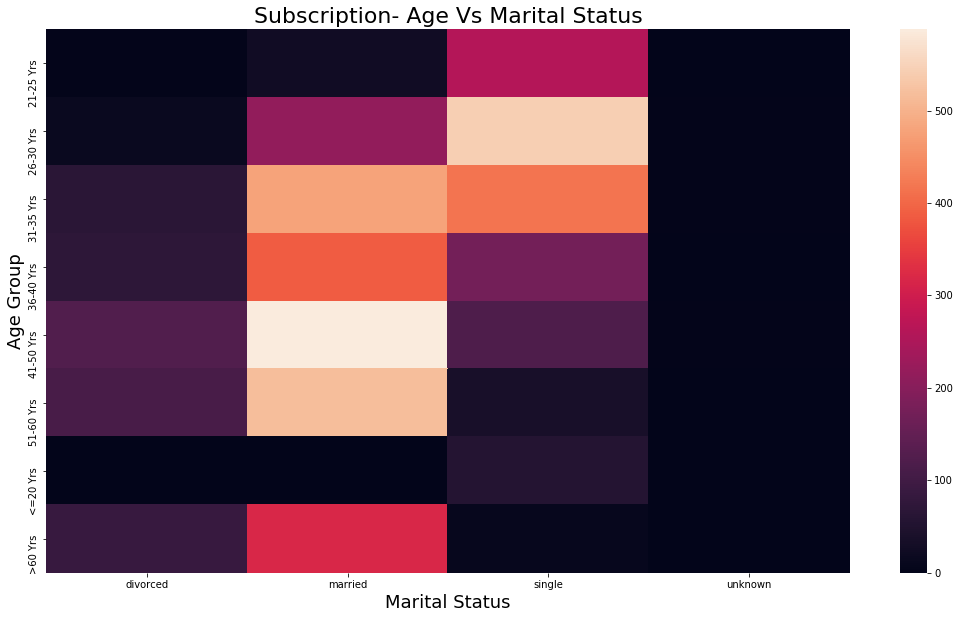

In [30]:
plt.figure(figsize=(18,10))

sns.heatmap(ageMarried)
plt.title("Subscription- Age Vs Marital Status",fontsize=22,y=2.02)
plt.xlabel("Marital Status",fontsize=18)
plt.ylabel("Age Group",fontsize=18)
plt.show()

<div class="alert alert-block alert-danger">
<b>Observations - Based on Age and Marital Status combined</b>
</div>
<div><i>From the above, we observe that the people from the Age Groups 26 yrs to 40 yrs of Single/Married and few more from the agr group 51 yrs to 60 yrs are also intersted in a short term investment plan</i></div>

###### 2.2.5. Plot-5::::Analysis - Opt for Term Deposit - With/Without Loan

In [31]:
#This function is to consolidate the loan into one column
def loanFun(data):
    if data['loan'] =='no' and data['housing']=='no':
        return 1
    elif data['loan'] =='yes' or data['housing']=='yes':
        return 1
    elif data['loan'] =='yes' or data['housing']=='no':
        return 1
    elif data['loan'] =='no' or data['housing']=='yes':
        return 1
    else:
        return 0

In [32]:
#Adding a new column named hasLoan to the temp dataframe, consolidating the loans - 'housing' and 'loan' as one feature.
#This is created to see how many opted for Term Deposit, when they have other loans
datasetCopy['hasLoan'] = datasetCopy.apply(loanFun, axis=1)

In [33]:
datasetCopy['hasLoan'].value_counts()

1    40198
0      990
Name: hasLoan, dtype: int64

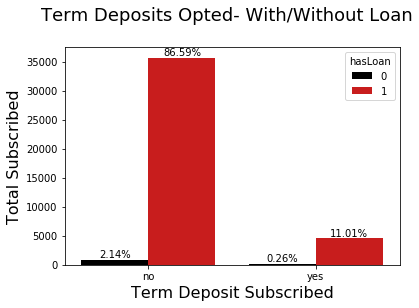

In [34]:
colors = ["black", "red"]

view=sns.countplot(x="y",hue="hasLoan", data=datasetCopy,palette=sns.xkcd_palette(colors));
ncount=len(datasetCopy)
plt.suptitle("Term Deposits Opted- With/Without Loan", fontsize=18,y=1.02)
view.set_xlabel("Term Deposit Subscribed",fontsize=16)
view.set_ylabel("Total Subscribed",fontsize=16)

for p in view.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    view.annotate('{:.2f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') 

<div class="alert alert-block alert-danger">
<b>Observations - Based on Loans (Consolidated)</b>
</div>
<div><i>1. From the total group of population, only 11.01% opts for Term Deposit even when they have any of the loans and that turned to be a higher compared to the subscriptions from the people who has no loans</i></div>
<div><i>2. Let's not worry about the loan status of the people in the future campaigns. Because, people are willing to subscribe Term Deposits irrespective of the loan status.</i></div>

###### 2.2.6. Plot-6::::Analysis - Opt for Term Deposit - Based on Previous Campaign

In [35]:
# This function is to modify the pdays by aggregating to a common value
def pDaysCalc(data):
    if data['pdays']!=999:
        val= data['pdays']/7
        if val<1:
            return '< 1 Week'
        if 1<=val<2:
            return '< 2 Weeks'
        if 2<=val<3:
            return '< 3 Weeks'
    elif data['pdays']==999:
        return 'Not Contacted'

In [36]:
#New column named 'pdaysMody' is added to the temp dataset to understand after how many attempts of call, people opt for Term Deposit
datasetCopy['pdaysMody'] = datasetCopy.apply(pDaysCalc, axis=1)

In [37]:
datasetCopy['pdaysMody'].value_counts()

Not Contacted    39673
< 1 Week          1117
< 2 Weeks          316
< 3 Weeks           74
Name: pdaysMody, dtype: int64

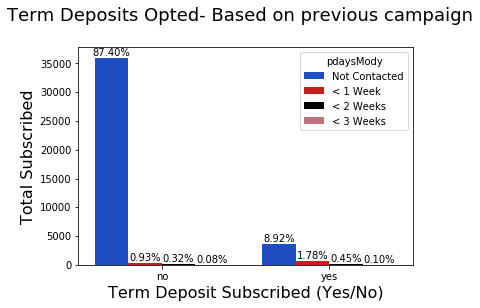

In [38]:
colors = ["blue", "red",'black','rose']

view=sns.countplot(x="y",hue="pdaysMody", data=datasetCopy,palette=sns.xkcd_palette(colors));
ncount=len(datasetCopy)
plt.suptitle("Term Deposits Opted- Based on previous campaign", fontsize=18,y=1.02)
view.set_xlabel("Term Deposit Subscribed (Yes/No)",fontsize=16)
view.set_ylabel("Total Subscribed",fontsize=16)

for p in view.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    view.annotate('{:.2f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') 

<div class="alert alert-block alert-danger">
<b>Observations - Based on Previous Campaign</b>
</div>
<div><i>1. From the total data, majority of the people i.e. around 8.92% who opt for Term Deposit made their decision of opting Term Deposits in the first attempt of the call made to the user.
</i></div>
<div><i>2. So, it is the first call that is making the difference. Marketing team can focus of how they can attract the users in the first attempt by explaining the features in a better way
</i></div>

###### 2.2.7. Plot-7::::Analysis - Opt for Term Deposit - Based on Duration

In [39]:
#This functions is to categorize the total duration to a limited category for better visualisation
def changeToHrs(data):
    data=data/(60*60)
    #print(data)
    if data <=0.25:
        return '< 15 Mins'
    elif 0.26<=data <=0.5:
        return '15-30 Mins'
    elif 0.6 <data<=0.75:
        return '30-45 Mins'
    elif 0.76<data<=1:
        return '45 Mins-1 Hr'
    elif data >1:
        return '>1 Hr'

In [40]:
subscribedData['DurationHRS']=[changeToHrs(x) for x in subscribedData['duration']]

C:\Users\Rebecca\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [41]:
others = pd.crosstab(index=subscribedData["ageGroup"], 
                          columns=[subscribedData["DurationHRS"]])

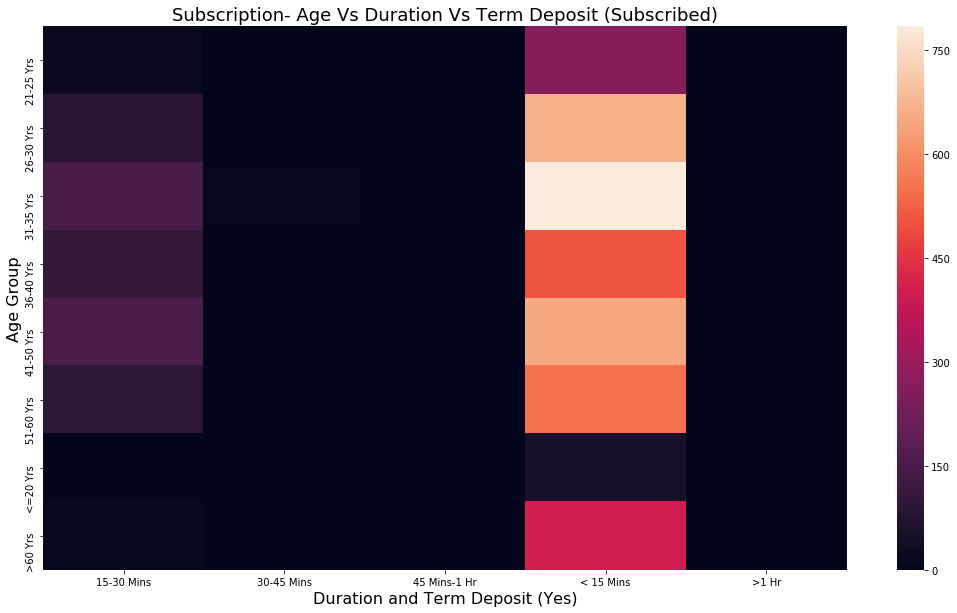

In [42]:
plt.figure(figsize=(18,10))

sns.heatmap(others)
plt.title("Subscription- Age Vs Duration Vs Term Deposit (Subscribed)",fontsize=18,y=1.02)
plt.xlabel("Duration and Term Deposit (Yes)",fontsize=16)
plt.ylabel("Age Group",fontsize=16)
plt.show()

<div class="alert alert-block alert-danger">
<b>Observations - Based on Contact Duration</b>
</div>
<div><i>1. This shows that people have made a decision to opt Term Deposit in a shorter time of convincing by the marketing person.</i></div>
<div><i>2. In our future campaign, marketing people need to concentrate and put efforts in finding ways on how to impress or convince the customer in a shorter time</i></div>

###### 2.2.8. Plot-8::::Analysis - Opt for Term Deposit - Based on Job and Education

In [43]:
# Grouping the dataframe by Job and Education to find out the education standard of the opted customers
others = pd.crosstab(index=subscribedData["job"], 
                          columns=[subscribedData['education']])

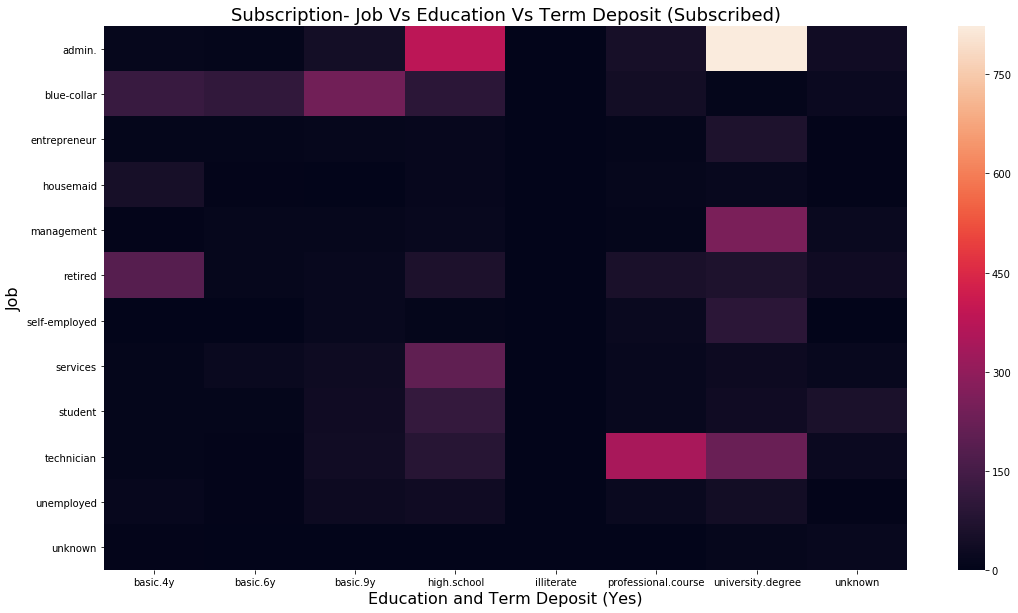

In [44]:
plt.figure(figsize=(18,10))

sns.heatmap(others)
plt.title("Subscription- Job Vs Education Vs Term Deposit (Subscribed)",fontsize=18,y=1.15)
plt.xlabel("Education and Term Deposit (Yes)",fontsize=16)
plt.ylabel("Job",fontsize=16)
plt.show()

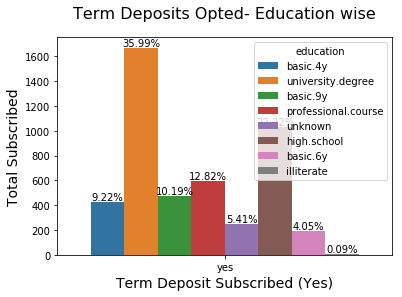

In [45]:
view=sns.countplot(x="y",hue="education", data=subscribedData);
ncount=len(subscribedData)
#plt.suptitle("Term Deposits Opted- Job wise")
#view.set_xlabel("Term Deposit Subscribed")
#view.set_ylabel("Total Subscribed")
plt.xlabel("Term Deposit Subscribed (Yes)",fontsize=14)
plt.ylabel("Total Subscribed",fontsize=14)
plt.title("Term Deposits Opted- Education wise",fontsize=16,y=1.06)

for p in view.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    view.annotate('{:.2f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') 

<div class="alert alert-block alert-danger">
<b>Observations - Based on Education</b>
</div>
<div><i>1. We can see that educated people are more interested in subscribing Term Deposits</i></div>
<div><i>2. So team can woek on finding out new attracting offers and schemes to attarct the other group of people, where we can also see better subscriptions from the people of different education background.</i></div>
<div><i>3. And also should concentrate on how better we can benefit then with new strategies.</i></div>

In [46]:
datasetCopy['y']=dataset['y']

In [47]:
datasetCopy['y']=[0 if x=='no' else 1 for x in datasetCopy['y']]

In [48]:
datasetCopy['y']= pd.to_numeric(datasetCopy['y'])

In [49]:
datasetCopy['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [50]:
datasetCopy.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,hasLoan
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399,0.001092
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,0.405274,0.004897
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357,0.000396
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,-0.324914,-0.002033
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181,-0.003769
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334,-0.003152
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211,-0.016361
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,0.054878,-0.007236
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,-0.307771,-0.002873
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,-0.354678,0.001257


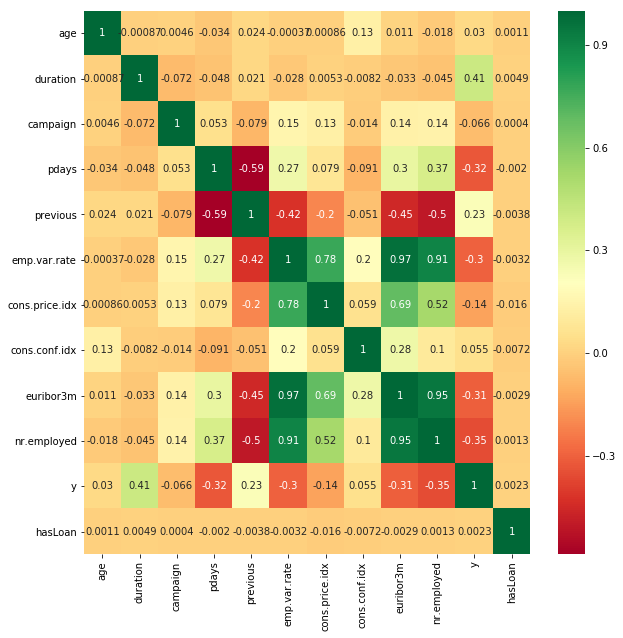

In [51]:
correlation = datasetCopy.corr()
plt.figure(figsize=(10,10))
g = sns.heatmap(datasetCopy.corr(),annot=True,cmap="RdYlGn")

##### 2.3. Data Transformation

In [52]:
dataset['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [53]:
# Converting the predictant value to have discrete values
dataset['y']=[0 if x=='no' else 1 for x in dataset['y']]

In [54]:
# Assigning the predictant to a new variable
termDeposit=dataset['y']

In [55]:
# Making the main dataset to have only the predictor variables,by dropping the predictant variable'y'
dataset.drop(columns='y',inplace=True)

In [56]:
dataset.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [57]:
# Finding the list of features of type Object to perform the data tranformation
objectColumns = dataset.iloc[:, :].select_dtypes(include=['object']).columns
objectColumns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [58]:
from sklearn.preprocessing import OneHotEncoder
oe=OneHotEncoder()

In [59]:
# This function is to tranform the features of type Object to integer type
col=0
def objectConversion(data):
    for i in data:
       # print(i)
        if(data[i].dtype=='object'):
            colName=i+'_dummy'
            #print(i)
            dummyColumns=pd.get_dummies(data[i],prefix=colName,dummy_na=False)
            data=data.drop(i,1)
            data=pd.concat([data,dummyColumns],axis=1)
            
        
    return data

In [60]:
newDF=objectConversion(dataset)

In [61]:
newDF.head(1)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_dummy_oct,month_dummy_sep,day_of_week_dummy_fri,day_of_week_dummy_mon,day_of_week_dummy_thu,day_of_week_dummy_tue,day_of_week_dummy_wed,poutcome_dummy_failure,poutcome_dummy_nonexistent,poutcome_dummy_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0


In [62]:
newDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 63 columns):
age                                    41188 non-null int64
duration                               41188 non-null int64
campaign                               41188 non-null int64
pdays                                  41188 non-null int64
previous                               41188 non-null int64
emp.var.rate                           41188 non-null float64
cons.price.idx                         41188 non-null float64
cons.conf.idx                          41188 non-null float64
euribor3m                              41188 non-null float64
nr.employed                            41188 non-null float64
job_dummy_admin.                       41188 non-null uint8
job_dummy_blue-collar                  41188 non-null uint8
job_dummy_entrepreneur                 41188 non-null uint8
job_dummy_housemaid                    41188 non-null uint8
job_dummy_management                   41

### 3. Modeling the problem

<div>  It is a classification problem of determing whether the user will opt Term Deposits given different features of the user.</div>

<div><i>     </i></div>

<div>  Here, I am going to test the predictions using the Logistic regression with and without RFE, then followed by Random Forest Classifier by finding out the best hyperparameters and applying in the Randomized Search CV regularisation technique.</div>

In [63]:
# Importing the relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn import feature_selection
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from pprint import pprint
#Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve, auc

In [64]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(newDF,termDeposit,test_size=0.3,random_state=1)

In [65]:
sc = StandardScaler()
Xtrain = sc.fit_transform(Xtrain)
Xtest= sc.transform(Xtest)

##### 3.1. Logistic Regression with no tuning

In [66]:
logreg=LogisticRegression()
logreg.fit(Xtrain,Ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [67]:
Predicted=logreg.predict(Xtest)

In [68]:
print('Accuracy')
accuracy=accuracy_score(Ytest,Predicted)
print(accuracy)

Accuracy
0.9099295945617868


In [69]:
cmLRb=confusion_matrix(Ytest,Predicted)
cmLRb
print(classification_report(Ytest,Predicted))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10944
           1       0.67      0.43      0.52      1413

   micro avg       0.91      0.91      0.91     12357
   macro avg       0.80      0.70      0.73     12357
weighted avg       0.90      0.91      0.90     12357



In [70]:
false_positive_rateLRb, true_positive_rateLRb, thresholdsLRb = roc_curve(Ytest, Predicted)
roc_aucLRb = auc(false_positive_rateLRb, true_positive_rateLRb)

In [71]:
# This variable is created to store the accuracies of all the models
outputs=dict()

In [72]:
outputs={"**Accuracy- Logistic Regression**":accuracy}

##### 3.2. Logistic Regression after cross validation

In [73]:
kFold=model_selection.KFold(n_splits=10,random_state=101)
modelCV=LogisticRegression()
scoring='accuracy'
results=model_selection.cross_val_score(modelCV,Xtrain,Ytrain,cv=kFold,scoring=scoring)
print(results.mean())
accuracy=results.mean()

0.9106863468137625


In [74]:
# Logistic regression performs pretty well after cross validation

In [75]:
outputs

{'**Accuracy- Logistic Regression**': 0.9099295945617868}

In [76]:
logreg=LogisticRegression()

In [80]:
n=len(newDF.columns)

In [81]:
names = newDF.columns

In [82]:
pscore=0
numF=0
pi=0
features=[]
for i in range(2,n+1):
    numF=i+1
    featu = feature_selection.RFE(estimator=logreg, n_features_to_select=numF, step=1)
    #featu.get_support()    
    toPredict=featu.fit(Xtrain,Ytrain)
    Predicted=toPredict.predict(Xtest)
    print('Accuracy with ',numF,' features:')
    act=accuracy_score(Ytest,Predicted)
    print(' ',act)
    if numF==21:
        pscore=act
        pi=numF
        print ("Features sorted by their rank:")
        print('******************************************')
        print(sorted(zip(map(lambda x: round(x, 4), featu.ranking_), names)))
        print('******************************************')
    if act>pscore:
        pscore=act
        pi=numF
        print ("Features sorted by their rank:")
        print('******************************************')
        print(sorted(zip(map(lambda x: round(x, 4), featu.ranking_), names)))
        print('******************************************')
        false_positive_rateLR, true_positive_rateLR, thresholdsLR = roc_curve(Ytest, Predicted)
        roc_aucLR = auc(false_positive_rateLR, true_positive_rateLR)
    print('   Best accuracy Score so far is: ',pscore,', obtained with ',pi,' features')
    
    

Accuracy with  3  features:
  0.9031318281136198
Features sorted by their rank:
******************************************
[(1, 'duration'), (1, 'month_dummy_may'), (1, 'nr.employed'), (2, 'emp.var.rate'), (3, 'pdays'), (4, 'euribor3m'), (5, 'cons.price.idx'), (6, 'month_dummy_aug'), (7, 'contact_dummy_cellular'), (8, 'month_dummy_mar'), (9, 'poutcome_dummy_failure'), (10, 'month_dummy_nov'), (11, 'contact_dummy_telephone'), (12, 'poutcome_dummy_success'), (13, 'default_dummy_no'), (14, 'month_dummy_jun'), (15, 'campaign'), (16, 'job_dummy_blue-collar'), (17, 'day_of_week_dummy_wed'), (18, 'job_dummy_services'), (19, 'day_of_week_dummy_tue'), (20, 'marital_dummy_single'), (21, 'job_dummy_retired'), (22, 'education_dummy_basic.4y'), (23, 'month_dummy_jul'), (24, 'age'), (25, 'job_dummy_student'), (26, 'education_dummy_university.degree'), (27, 'default_dummy_unknown'), (28, 'default_dummy_yes'), (29, 'month_dummy_sep'), (30, 'poutcome_dummy_nonexistent'), (31, 'job_dummy_admin.'), (32, 

Accuracy with  8  features:
  0.907825523994497
Features sorted by their rank:
******************************************
[(1, 'cons.price.idx'), (1, 'duration'), (1, 'emp.var.rate'), (1, 'euribor3m'), (1, 'month_dummy_aug'), (1, 'month_dummy_may'), (1, 'nr.employed'), (1, 'pdays'), (2, 'contact_dummy_cellular'), (3, 'month_dummy_mar'), (4, 'poutcome_dummy_failure'), (5, 'month_dummy_nov'), (6, 'contact_dummy_telephone'), (7, 'poutcome_dummy_success'), (8, 'default_dummy_no'), (9, 'month_dummy_jun'), (10, 'campaign'), (11, 'job_dummy_blue-collar'), (12, 'day_of_week_dummy_wed'), (13, 'job_dummy_services'), (14, 'day_of_week_dummy_tue'), (15, 'marital_dummy_single'), (16, 'job_dummy_retired'), (17, 'education_dummy_basic.4y'), (18, 'month_dummy_jul'), (19, 'age'), (20, 'job_dummy_student'), (21, 'education_dummy_university.degree'), (22, 'default_dummy_unknown'), (23, 'default_dummy_yes'), (24, 'month_dummy_sep'), (25, 'poutcome_dummy_nonexistent'), (26, 'job_dummy_admin.'), (27, 'job_d

Accuracy with  14  features:
  0.9104151493080845
   Best accuracy Score so far is:  0.9112244072185806 , obtained with  11  features
Accuracy with  15  features:
  0.9103342235170349
   Best accuracy Score so far is:  0.9112244072185806 , obtained with  11  features
Accuracy with  16  features:
  0.9099295945617868
   Best accuracy Score so far is:  0.9112244072185806 , obtained with  11  features
Accuracy with  17  features:
  0.9100105203528365
   Best accuracy Score so far is:  0.9112244072185806 , obtained with  11  features
Accuracy with  18  features:
  0.9098486687707372
   Best accuracy Score so far is:  0.9112244072185806 , obtained with  11  features
Accuracy with  19  features:
  0.9100105203528365
   Best accuracy Score so far is:  0.9112244072185806 , obtained with  11  features
Accuracy with  20  features:
  0.909686817188638
   Best accuracy Score so far is:  0.9112244072185806 , obtained with  11  features
Accuracy with  21  features:
  0.9102532977259853
Features sort

Accuracy with  48  features:
  0.9102532977259853
   Best accuracy Score so far is:  0.9104151493080845 , obtained with  35  features
Accuracy with  49  features:
  0.9102532977259853
   Best accuracy Score so far is:  0.9104151493080845 , obtained with  35  features
Accuracy with  50  features:
  0.9100105203528365
   Best accuracy Score so far is:  0.9104151493080845 , obtained with  35  features
Accuracy with  51  features:
  0.9100105203528365
   Best accuracy Score so far is:  0.9104151493080845 , obtained with  35  features
Accuracy with  52  features:
  0.9099295945617868
   Best accuracy Score so far is:  0.9104151493080845 , obtained with  35  features
Accuracy with  53  features:
  0.9099295945617868
   Best accuracy Score so far is:  0.9104151493080845 , obtained with  35  features
Accuracy with  54  features:
  0.9099295945617868
   Best accuracy Score so far is:  0.9104151493080845 , obtained with  35  features
Accuracy with  55  features:
  0.9099295945617868
   Best accu

In [83]:
roc_aucLR

0.70042305704548

In [84]:
outputs.update({"**Accuracy- Logistic Regression (after performing RFE)**":pscore})

In [85]:
cmLR=confusion_matrix(Ytest,Predicted)
cmLR
print(classification_report(Ytest,Predicted))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10944
           1       0.67      0.43      0.52      1413

   micro avg       0.91      0.91      0.91     12357
   macro avg       0.80      0.70      0.73     12357
weighted avg       0.90      0.91      0.90     12357



In [86]:
outputs

{'**Accuracy- Logistic Regression**': 0.9099295945617868,
 '**Accuracy- Logistic Regression (after performing RFE)**': 0.9104151493080845}

In [87]:
kFold=model_selection.KFold(n_splits=10,random_state=101)
#modelCV=LogisticRegression()
scoring='accuracy'
results=model_selection.cross_val_score(featu,Xtrain,Ytrain,cv=kFold,scoring=scoring)
print(results.mean())

0.9106863468137625


##### 3.3. Random Forest Classifier with tuned hyperparameters

In [88]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(newDF,termDeposit,test_size=0.3,random_state=1)

In [89]:
numoffeatureszz=np.arange(0.1,1.1,0.1)
numoffeatureszz

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [90]:
numofestimators=[1,5,10,20,25,30]
numofleafs=[1,3,5,10,25]
numoffeatures=np.arange(0.1,1.1,0.1)
error_rate={}
best_result=[]
i=1
for Numofestimator in numofestimators:
    #print('ESTIMATE')
    #print(Numofestimator,' is the Number of Estimator to test')
    for Numofleafs in numofleafs:
        #print('LEAFFFFF')
        #print(Numofleafs,' is the Num of leafs to test')
        for Numoffeatures in numoffeatures:
            #print('**',Numoffeatures)
            result=[Numofestimator,Numofleafs,Numoffeatures]
            m=RandomForestClassifier(n_jobs=-1,n_estimators=Numofestimator,min_samples_leaf=Numofleafs,
                                    max_features=Numoffeatures,oob_score=True)
            m.fit(Xtrain,Ytrain)
            oob_error = 1 - m.oob_score_
            error_rate[i] = oob_error
            result.append(m.score(Xtrain,Ytrain))
            result.append(m.score(Xtest,Ytest))
            result.append(oob_error)
            #print('############')
            if len(best_result)==0:
                best_result=result
            elif best_result[4]<result[4]:
                #print('Estimator','Leafs','No Features','Train Score','Test Score')
                #print(result, ' is the score obtained for the data tested')
                best_result=result
    i=i+1

print('Final Best Result',best_result)
print('Estimator','Leafs','No Features','Train Score','Test Score','OOB Error')

Final Best Result [25, 10, 0.7000000000000001, 0.9432902084561756, 0.9189123573682932, 0.08633068572023173]
Estimator Leafs No Features Train Score Test Score OOB Error


In [91]:
m=RandomForestClassifier(n_jobs=-1,n_estimators=25,min_samples_leaf=25,
                                    max_features=0.9,oob_score=True)
m.fit(Xtrain,Ytrain)
oob_error = 1 - m.oob_score_

In [92]:
Predicted=m.predict(Xtest)
accuracy=accuracy_score(Ytest,Predicted)
print(accuracy)

0.9159990288905074


In [93]:
false_positive_rateRF, true_positive_rateRF, thresholdsRF = roc_curve(Ytest, Predicted)
roc_aucRF = auc(false_positive_rateRF, true_positive_rateRF)

In [94]:
outputs.update({"**Accuracy- Random Forest Classifier after tuning hyperparameters**":accuracy})

In [95]:
cmRF=confusion_matrix(Ytest,Predicted)
cmRF

print(classification_report(Ytest,Predicted))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10944
           1       0.66      0.55      0.60      1413

   micro avg       0.92      0.92      0.92     12357
   macro avg       0.80      0.76      0.78     12357
weighted avg       0.91      0.92      0.91     12357



##### 3.4. Random Forest Classifier after applying Randomized Search CV regularisation

In [96]:
forest=RandomForestClassifier(n_jobs=-1)

In [97]:
n_estimators=[int(x) for x in np.linspace(start=20,stop=200,num=9)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(1,45,num=3)]
min_samples_split=[5,10]
random_grid={'n_estimators':n_estimators,'max_features':max_features,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split}

pprint(random_grid)

{'max_depth': [1, 23, 45],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [5, 10],
 'n_estimators': [20, 42, 65, 87, 110, 132, 155, 177, 200]}


In [98]:
rf_random=RandomizedSearchCV(estimator=forest,param_distributions=random_grid,n_iter=10,cv=10,random_state=99,n_jobs=-1,scoring='neg_mean_squared_error')
rf_random.fit(Xtrain,Ytrain)


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': [20, 42, 65, 87, 110, 132, 155, 177, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [1, 23, 45], 'min_samples_split': [5, 10]},
          pre_dispatch='2*n_jobs', random_state=99, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [99]:
random_best=rf_random.best_estimator_.predict(Xtest)
final_mse=mean_squared_error(Ytest,random_best)
accuracy=accuracy_score(Ytest,random_best)
final_rmse=np.sqrt(final_mse)
print('The best model from randomized search has a RMSE of',round(final_rmse,2))

The best model from randomized search has a RMSE of 0.29


In [100]:
false_positive_rateRFCV, true_positive_rateRFCV, thresholdsRFCV = roc_curve(Ytest, random_best)
roc_aucRFCV = auc(false_positive_rateRFCV, true_positive_rateRFCV)

In [101]:
print(accuracy)

0.9140568099053168


In [102]:
outputs.update({"**Accuracy- Random Forest Classifier with Randomized CV**":accuracy})

In [103]:
outputs

{'**Accuracy- Logistic Regression**': 0.9099295945617868,
 '**Accuracy- Logistic Regression (after performing RFE)**': 0.9104151493080845,
 '**Accuracy- Random Forest Classifier after tuning hyperparameters**': 0.9159990288905074,
 '**Accuracy- Random Forest Classifier with Randomized CV**': 0.9140568099053168}

##### 3.5. Measuring Feature Importance with Random Forest Classifier

In [104]:
importances = m.feature_importances_
indices = np.argsort(importances)[::-1]

In [105]:
# Print the feature ranking
print("Feature ranking:")

for f in range(Xtrain.shape[1]):
    print(names[indices[f]],"::--","%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
duration ::-- 1. feature 1 (0.464962)
nr.employed ::-- 2. feature 9 (0.278928)
euribor3m ::-- 3. feature 8 (0.068936)
cons.conf.idx ::-- 4. feature 7 (0.032977)
age ::-- 5. feature 0 (0.030964)
pdays ::-- 6. feature 3 (0.030652)
poutcome_dummy_success ::-- 7. feature 62 (0.015194)
cons.price.idx ::-- 8. feature 6 (0.012137)
campaign ::-- 9. feature 2 (0.008986)
education_dummy_university.degree ::-- 10. feature 32 (0.004679)
month_dummy_mar ::-- 11. feature 50 (0.003907)
month_dummy_apr ::-- 12. feature 45 (0.003628)
marital_dummy_single ::-- 13. feature 24 (0.002766)
month_dummy_oct ::-- 14. feature 53 (0.002676)
day_of_week_dummy_thu ::-- 15. feature 57 (0.002622)
housing_dummy_yes ::-- 16. feature 39 (0.002567)
marital_dummy_married ::-- 17. feature 23 (0.002487)
job_dummy_admin. ::-- 18. feature 10 (0.002372)
housing_dummy_no ::-- 19. feature 37 (0.002031)
emp.var.rate ::-- 20. feature 5 (0.001793)
contact_dummy_telephone ::-- 21. feature 44 (0.001708)
day_of_week_

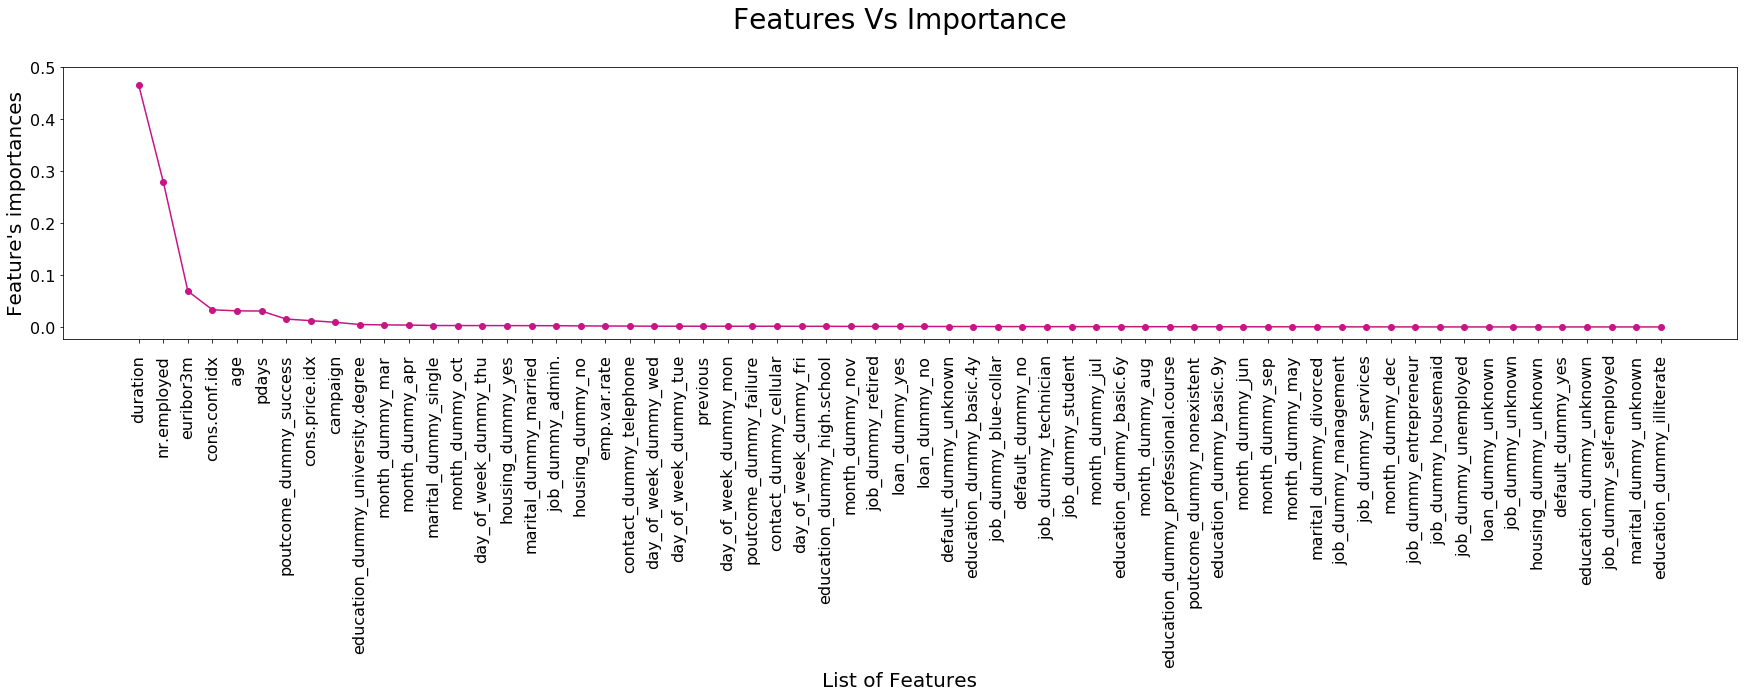

In [106]:
import seaborn as sns
plt.figure(figsize=(30,5))
plt.plot( names[indices],importances[indices], marker='o', color='mediumvioletred')
plt.title('Features Vs Importance',fontsize=28,y=1.12)
plt.xlabel('List of Features',fontsize=20,y=1.12)
plt.ylabel("Feature's importances",fontsize=20)
plt.xticks(names[indices], rotation=90,fontsize=16,y=-0.03)
plt.yticks([0,0.1,0.2,0.3,0.4,0.5],fontsize=16)
plt.show()


In [107]:
dc=newDF.copy()

In [108]:
#Checking the feature importance
from numpy import sort
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBClassifier
thresholds = sort(m.feature_importances_)
for thresh in thresholds:
# select features using threshold
    selection = SelectFromModel(m, threshold=thresh, prefit=True)
    select_X_train = selection.transform(Xtrain)
    # train model
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, Ytrain)
    # eval model
    select_X_test = selection.transform(Xtest)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(Ytest, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Thresh=0.000, n=63, Accuracy: 91.53%
Thresh=0.000, n=63, Accuracy: 91.53%
Thresh=0.000, n=63, Accuracy: 91.53%
Thresh=0.000, n=63, Accuracy: 91.53%
Thresh=0.000, n=63, Accuracy: 91.53%
Thresh=0.000, n=63, Accuracy: 91.53%
Thresh=0.000, n=63, Accuracy: 91.53%
Thresh=0.000, n=63, Accuracy: 91.53%
Thresh=0.000, n=55, Accuracy: 91.53%
Thresh=0.000, n=54, Accuracy: 91.53%
Thresh=0.000, n=53, Accuracy: 91.54%
Thresh=0.000, n=52, Accuracy: 91.54%
Thresh=0.000, n=51, Accuracy: 91.54%
Thresh=0.000, n=50, Accuracy: 91.59%
Thresh=0.000, n=49, Accuracy: 91.54%
Thresh=0.000, n=48, Accuracy: 91.54%
Thresh=0.000, n=47, Accuracy: 91.73%
Thresh=0.000, n=46, Accuracy: 91.73%
Thresh=0.000, n=45, Accuracy: 91.67%
Thresh=0.000, n=44, Accuracy: 91.67%
Thresh=0.000, n=43, Accuracy: 91.67%
Thresh=0.000, n=42, Accuracy: 91.70%
Thresh=0.001, n=41, Accuracy: 91.70%
Thresh=0.001, n=40, Accuracy: 91.75%
Thresh=0.001, n=39, Accuracy: 91.75%
Thresh=0.001, n=38, Accuracy: 91.70%
Thresh=0.001, n=37, Accuracy: 91.79%
T

<div class="alert alert-block alert-danger">
<b>Observations - Feature Selection</b>
</div>
<div> <i>Maximum accuracy is obtained with 23 features. So in the next step, creating a new data frame with 23 features based on the feature importance.

Below features are considered for the final model implementation:
'duration'
'nr.employed'
'euribor3m'
'cons.conf.idx'
'pdays'
'age'
'poutcome_dummy_success'
'cons.price.idx','campaign'
'month_dummy_mar'
'education_dummy_university.degree'
'day_of_week_dummy_thu'
'month_dummy_apr'
'marital_dummy_married'
'job_dummy_admin.'
'housing_dummy_yes'
'marital_dummy_single'
'emp.var.rate'
'housing_dummy_no'
'month_dummy_oct'
'contact_dummy_cellular'
'day_of_week_dummy_mon'
'previous'</i></div>

###### Model Implementation after applying the important features

In [109]:
newX=newDF[['duration','nr.employed','euribor3m',
         'cons.conf.idx','pdays','age',
         'poutcome_dummy_success','cons.price.idx','campaign',
         'month_dummy_mar','education_dummy_university.degree','day_of_week_dummy_thu',
         'month_dummy_apr','marital_dummy_married','job_dummy_admin.','housing_dummy_yes',
         'marital_dummy_single','emp.var.rate','housing_dummy_no','month_dummy_oct',
         'contact_dummy_cellular','day_of_week_dummy_mon','previous']]

In [110]:
newX.shape

(41188, 23)

In [111]:
newY=termDeposit

In [112]:
#Logistic Regression after adding important columns
Xtrain,Xtest,Ytrain,Ytest=train_test_split(newX,newY,test_size=0.3,random_state=1)
logreg=LogisticRegression()
logreg.fit(Xtrain,Ytrain)
PredictedFI=logreg.predict(Xtest)
print('Accuracy')
accuracy=accuracy_score(Ytest,PredictedFI)
print(accuracy)
cmLRbFI=confusion_matrix(Ytest,PredictedFI)
cmLRbFI
print(classification_report(Ytest,PredictedFI))
false_positive_rateLRbFI, true_positive_rateLRbFI, thresholdsLRbFI = roc_curve(Ytest, PredictedFI)
roc_aucLRbFI = auc(false_positive_rateLRbFI, true_positive_rateLRbFI)
outputs={"**Accuracy- Logistic Regression after Feature Importance**":accuracy}


Accuracy
0.9085538561139435
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10944
           1       0.67      0.40      0.50      1413

   micro avg       0.91      0.91      0.91     12357
   macro avg       0.80      0.69      0.72     12357
weighted avg       0.90      0.91      0.90     12357



In [113]:
#Random Forest after adding important columns
mf=RandomForestClassifier(n_jobs=-1,n_estimators=25,min_samples_leaf=25,
                                    max_features=0.9,oob_score=True)
mf.fit(newX,newY)
oob_error = 1 - mf.oob_score_
PredictedFI=mf.predict(Xtest)
accuracy=accuracy_score(Ytest,PredictedFI)
print(accuracy)
false_positive_rateRFFI, true_positive_rateRFFI, thresholdsRFFI = roc_curve(Ytest, PredictedFI)
roc_aucRFFI = auc(false_positive_rateRFFI, true_positive_rateRFFI)
outputs.update({"**Accuracy- Random Forest Classifier after Feature Importance**":accuracy})
cmRFFI=confusion_matrix(Ytest,PredictedFI)
cmRFFI

print(classification_report(Ytest,PredictedFI))

0.9304038196973375
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     10944
           1       0.73      0.61      0.67      1413

   micro avg       0.93      0.93      0.93     12357
   macro avg       0.84      0.79      0.81     12357
weighted avg       0.93      0.93      0.93     12357



###### Plotting the ROC Curve - Logistic Regression and Random Forest Classifier

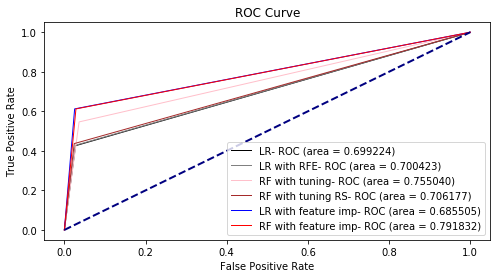

In [114]:
# Plotting the ROC curve of Logistic and Random Forest Classifier
plt.figure(figsize=(8,4))
plt.plot(false_positive_rateLRb, true_positive_rateLRb, color='black', lw=1, label='LR- ROC (area = %f)' % roc_aucLRb)
plt.plot(false_positive_rateLR, true_positive_rateLR, color='grey', lw=1, label='LR with RFE- ROC (area = %f)' % roc_aucLR)
plt.plot(false_positive_rateRF, true_positive_rateRF, color='pink', lw=1, label='RF with tuning- ROC (area = %f)' % roc_aucRF)
plt.plot(false_positive_rateRFCV, true_positive_rateRFCV, color='brown', lw=1, label='RF with tuning RS- ROC (area = %f)' % roc_aucRFCV)
plt.plot(false_positive_rateLRbFI, true_positive_rateRFFI, color='blue', lw=1, label='LR with feature imp- ROC (area = %f)' % roc_aucLRbFI)
plt.plot(false_positive_rateRFFI, true_positive_rateRFFI, color='red', lw=1, label='RF with feature imp- ROC (area = %f)' % roc_aucRFFI)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

<div class="alert alert-block alert-danger">
<b>Observations - Model Implementation after adding feature importance</b>
</div>
<div> <i>Accuracy score is best obtained with Random Forest classifier compared to the other implemented models. Choosing Random Forest Classifier for future predictions</i></div>

#### Model Deployment

In [115]:
from sklearn.externals import joblib
joblib.dump(mf,"BankMarketing.pkl")
new_m=joblib.load("BankMarketing.pkl")
Xtest.head(1)

,duration,nr.employed,euribor3m,cons.conf.idx,pdays,age,poutcome_dummy_success,cons.price.idx,campaign,month_dummy_mar,...,marital_dummy_married,job_dummy_admin.,housing_dummy_yes,marital_dummy_single,emp.var.rate,housing_dummy_no,month_dummy_oct,contact_dummy_cellular,day_of_week_dummy_mon,previous
35577,114,5099.1,1.244,-46.2,999,32,0,92.893,1,0,...,1,0,1,0,-1.8,0,0,1,1,0


In [116]:
# Predict the output for the whole dataset
b=new_m.predict(newX)

In [144]:
# Create this dataframe to make a copy with new columns added based on feature importance
newDFtoIns=newX.copy()
newDFtoIns['y']=newY

In [131]:
b=pd.DataFrame(b)

In [146]:
# Create a new sheet to write the values of the new dataframe that has the new columns

# Write the predicted values to the column next to the previous inputs

import openpyxl
from openpyxl import load_workbook

# Create a new excel workbook and a sheet
bookname = r"./fin.xlsx"

#openpyxl.save(bookname)
rb = openpyxl.load_workbook(bookname)
rb.create_sheet("Predicted")
#rb.save(workbook)
#fn="./final.xlsx"
writer = pd.ExcelWriter(bookname, engine='openpyxl')
book = load_workbook(bookname)
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
newDFtoIns.to_excel(writer, sheet_name='Predicted', header=True, index=False)
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
b.to_excel(writer, sheet_name='Predicted', header=True, index=False,
             startcol=24,startrow=1)

writer.save()